<a href="https://colab.research.google.com/github/R-aryan/Image_Classification_VGG16/blob/master/Classification_Cat_VS_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!unzip '/content/drive/My Drive/classification_Dataset/cat_VS_dogs/test1.zip' -d '/content/drive/My Drive/classification_Dataset/cat_VS_dogs'

In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [0]:
train_directory= "/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train"
test_directory="/content/drive/My Drive/classification_Dataset/cat_VS_dogs/test1"

In [0]:
import shutil
import os
from os import listdir
from os.path import splitext

In [0]:
src= '/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train'
dest_d='/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train/Dogs'
dest_c='/content/drive/My Drive/classification_Dataset/cat_VS_dogs/train/Cats'
validation_set='/content/drive/My Drive/classification_Dataset/cat_VS_dogs/validation_data'

In [15]:
c=1
for file in listdir(dest_d):
    filename = file[:3]
    f1=filename.lower()
    print(filename)
    c+=1
    
    try:
      if(filename=='cat'):
        shutil.move(os.path.join(src,file), dest_c)
        print("cat moved succesfully")
      else:
        shutil.move(os.path.join(src,file),dest_d)
        print("dog moved successfully")

    except:
      print("error occured at "+ file)

    if(c==10):
      break

print(c)

7997


In [38]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=src,target_size=(224,224),batch_size=32)

Found 20438 images belonging to 2 classes.


In [39]:
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=validation_set, target_size=(224,224),batch_size=32)

Found 98 images belonging to 2 classes.


Building the Model - VGG16 From Scratch

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

Here I have started with initialising the model by specifying that the model is a sequential model. After initialising the model I add

→ 2 x convolution layer of 64 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

→ 2 x convolution layer of 128 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

→ 3 x convolution layer of 256 channel of 3x3 kernal 
and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2
→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

I also add relu(Rectified Linear Unit) activation to each layers so that all the negative values are not passed to the next layer.

In [0]:
model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=2, activation="softmax"))

After creating all the convolution I pass the data to the dense layer so for that I flatten the vector which comes out of the convolutions and add

→ 1 x Dense layer of 4096 units

→ 1 x Dense layer of 4096 units

→ 1 x Dense Softmax layer of 2 units



In [0]:
from keras.optimizers import Adam

opt = Adam(lr=0.001)

model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 56, 56, 256)      

In [48]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/classification_Dataset/vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=200,generator=traindata, validation_data= testdata, validation_steps=80,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
200/200 [==============================] - 63s 315ms/step - loss: 6.1828 - acc: 0.6164 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/drive/My Drive/classification_Dataset/vgg16_1.h5
Epoch 2/100
200/200 [==============================] - 63s 314ms/step - loss: 6.3994 - acc: 0.6030 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/100
200/200 [==============================] - 63s 314ms/step - loss: 6.3456 - acc: 0.6063 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/100
200/200 [==============================] - 63s 314ms/step - loss: 6.3264 - acc: 0.6075 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/100
200/200 [==============================] - 63s 314ms/step - loss: 6.1677 - acc: 0.6173 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00005: val_acc did not improve fr

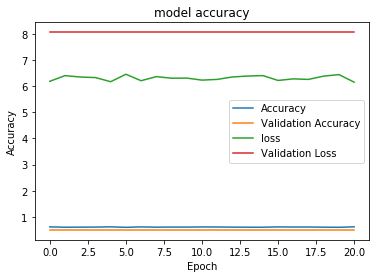

In [49]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
img = image.load_img("/content/drive/My Drive/classification_Dataset/cat_VS_dogs/test1/12500.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/My Drive/classification_Dataset/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


